# Example Notebook for ROC Curves 

This notebook will detail how to use the code to plot ROC curves for user defined parameters

First, we need to import the necessary code.  We also ask for matplotlib to display the ROC curve in the Notebook.

In [1]:
from roc import *
from node import Node
from cybernet import CyberNet
%matplotlib inline

The next step is to define the Node, let's see what we need to do.

In [2]:
help(Node)

Help on class Node in module node:

class Node(__builtin__.object)
 |  An SFT node.
 |  
 |  Parameters
 |  ----------
 |  
 |  name : str
 |      The name of the node.
 |  
 |  sends_to  : list of str
 |      A list whose elements are names of nodes that receive messages
 |      from the SFT instance.
 |  
 |  
 |  rates : dict
 |      A dictionary with keys being the elements of sends_to.  The
 |      entry is a pxq array where p = len(states) and q =
 |      len(messages).  The order is determined by the order of
 |      sends_to and messages. e.x. for some node, if sends_to is
 |      ['A', 'B'], states is ['normal', 'infected'] and messages are
 |      ['clean', 'malicious'] then rates can be:
 |      >>> {'A': [[1, 0],[1, .00001]] , 'B': [[1,0], [1, .1]]}
 |      which means that the SFT sends clean messages to 'A' at a rate
 |      of 1 when it is in the normal state and sends message no
 |      malicious messages.  When the SFT is in an infected state, it
 |      sends clean me

Essentially, all we need to do is name the node, indicate the name of other nodes that it sends messages to and indicate the rates it which it sends messages when it is in the normal and infected state.  Let's create a small 2 node network and then create a CyberNet instance.

In [3]:
A = Node("A", ["B"], {"B": np.array([[1,0],[1,.1]])})
B = Node("B", ["A"], {"A": np.array([[1,0], [1,.1]])})
net = CyberNet([A,B])

The code is set up so that after setting up the network, the only function the user needs to call is plot_roc_parallel, which of course runs in parallel.  Let's see what it looks like.

In [4]:
help(plot_roc_parallel)

Help on function plot_roc_parallel in module roc:

plot_roc_parallel(num_pos, num_neg, CyberNet, s0, T, truenet=None, directsamps=1000, seeds=None, numcores=4)
    Plots the ROC curve
    
    num_pos : int
        Number of true positive realizations of network activity per core
    
    num_neg :
        Number of true negative realizations of network activity per core
    
    CyberNet : CyberNet
        The CyberNet the defender uses to model the network
    
    
    s0 : dict
       Initial state of the net when there is an attacker
    
    T : int
        Observation Window
    
    truenet : CyberNet instance
        A net used to generate  data.  If model is misspecified,
        truenet is different from CyberNet
    
    
    direct_samps : int
        Number of samples to compute P(data|attacker)
    
    seeds : lsit
        List of seeds to pass to each process.  Difference between any
        two seeds must be greater than num_pos + num_neg
    
    numcores: int
      

Now we see the parameters needed to plot an ROC curve.  Let's define this in a dictionary

In [5]:
params = { "num_pos" : 300, # Network realizations with attacker
           "num_neg" : 300, # Network realizations without attacker
           "CyberNet" : net, #Network instance
           "s0": {"A": "infected", 
                  "B": "normal"}, #Initial state of nodes
           "T" : 10, #Observation Window
           "numcores" : 6
         }

Now, using the default argument for some of the arguments, we can now generate the ROC curve

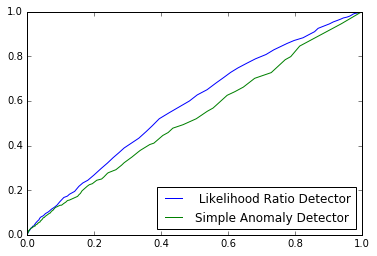

In [6]:
fig, ax = plot_roc_parallel(params["num_pos"],
                         params["num_neg"],
                         params["CyberNet"], 
                         params["s0"],
                         params["T"], 
                         numcores=params["numcores"])

Voila!